In [100]:
import pandas as pd
import string, re
from pathlib import Path
from collections import Counter

In [101]:
inputdir = Path("../data/resilience/wc")
df = pd.read_csv(Path(inputdir, "wos_explode_wc.csv"), encoding="utf-8", index_col = [0])
df.head()

,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,WE,SC,GA,PM,OA,HC,HP,DA,UT,wos_categs
0,J,"Jiang, YW; Ritchie, BW; Verreynne, ML",NaN,NaN,NaN,"Jiang, Yawei; Ritchie, Brent W.; Verreynne, Ma...",NaN,NaN,Developing disaster resilience: A processual a...,TOURISM MANAGEMENT,...,Social Science Citation Index (SSCI),Environmental Sciences & Ecology; Social Scien...,WQ3JE,NaN,NaN,NaN,NaN,2023-08-03,WOS:000713714900002,Environmental Studies
0,J,"Jiang, YW; Ritchie, BW; Verreynne, ML",NaN,NaN,NaN,"Jiang, Yawei; Ritchie, Brent W.; Verreynne, Ma...",NaN,NaN,Developing disaster resilience: A processual a...,TOURISM MANAGEMENT,...,Social Science Citation Index (SSCI),Environmental Sciences & Ecology; Social Scien...,WQ3JE,NaN,NaN,NaN,NaN,2023-08-03,WOS:000713714900002,"Hospitality, Leisure, Sport & Tourism"
0,J,"Jiang, YW; Ritchie, BW; Verreynne, ML",NaN,NaN,NaN,"Jiang, Yawei; Ritchie, Brent W.; Verreynne, Ma...",NaN,NaN,Developing disaster resilience: A processual a...,TOURISM MANAGEMENT,...,Social Science Citation Index (SSCI),Environmental Sciences & Ecology; Social Scien...,WQ3JE,NaN,NaN,NaN,NaN,2023-08-03,WOS:000713714900002,Management
1,J,"Nystrom, M; Graham, NAJ; Lokrantz, J; Norstrom...",NaN,NaN,NaN,"Nystrom, M.; Graham, N. A. J.; Lokrantz, J.; N...",NaN,NaN,Capturing the cornerstones of coral reef resil...,CORAL REEFS,...,Science Citation Index Expanded (SCI-EXPANDED),Marine & Freshwater Biology,368JC,NaN,NaN,NaN,NaN,2023-08-03,WOS:000260616400011,Marine & Freshwater Biology
2,J,"Cassidy, S",NaN,NaN,NaN,"Cassidy, Simon",NaN,NaN,The Academic Resilience Scale (ARS-30): A New ...,FRONTIERS IN PSYCHOLOGY,...,Social Science Citation Index (SSCI),Psychology,EC3JI,27917137.0,"Green Published, gold",NaN,NaN,2023-08-03,WOS:000388022000001,"Psychology, Multidisciplinary"


In [102]:
df["wos_categs"] = df["wos_categs"].fillna("")

## Import WoS group / category dataset

In [141]:
#wos_groups = pd.read_csv(Path("../data/JCR_CategoriesResults_grouplists.csv"), encoding = 'utf-8', index_col=[0])
wos_groups = pd.read_csv(Path("../data/JCR_CategoriesResults_groups.csv"), encoding = 'utf-8', index_col=[0])
wos_groups["Category"] = wos_groups["Category"].str.lower()
wos_groups = wos_groups.rename(columns={"# of journals": "journal_ct", "Citable Items": "citableitems_ct", "Total Citations": "totalcits_ct"})
wos_groups.head()

,Category,Group,journal_ct,citableitems_ct,totalcits_ct
0,acoustics,Physics,40,5733,262983
1,agricultural economics & policy,Agricultural Sciences;Economics & Business,38,1966,65113
2,agricultural engineering,Agricultural Sciences;Engineering,18,4611,308328
3,"agriculture, dairy & animal science",Agricultural Sciences;Biology & Biochemistry;P...,79,12348,353132
4,"agriculture, multidisciplinary",Agricultural Sciences;Biology & Biochemistry;M...,85,8885,381490


In [146]:
# wos group summaries

# wos_groups.groupby(by="Group").agg({"journal_ct": "sum", "citableitems_ct": "sum", "totalcits_ct": "sum"})


In [142]:
wos_groups_sub = wos_groups.loc[:, ["Category", "Group"]]
wos_groups_sub.head()

,Category,Group
0,acoustics,Physics
1,agricultural economics & policy,Agricultural Sciences;Economics & Business
2,agricultural engineering,Agricultural Sciences;Engineering
3,"agriculture, dairy & animal science",Agricultural Sciences;Biology & Biochemistry;P...
4,"agriculture, multidisciplinary",Agricultural Sciences;Biology & Biochemistry;M...


In [105]:
df["wos_categs"] = df["wos_categs"].str.lower()

## Add WoS Groups to WoS document dataset by matching to categories

In [106]:
df2 = pd.merge(df, wos_groups_sub, how="inner", left_on="wos_categs", right_on="Category")
print(df2.shape)
df2.head()

(5532, 74)


,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,GA,PM,OA,HC,HP,DA,UT,wos_categs,Category,Group
0,J,"Jiang, YW; Ritchie, BW; Verreynne, ML",NaN,NaN,NaN,"Jiang, Yawei; Ritchie, Brent W.; Verreynne, Ma...",NaN,NaN,Developing disaster resilience: A processual a...,TOURISM MANAGEMENT,...,WQ3JE,NaN,NaN,NaN,NaN,2023-08-03,WOS:000713714900002,environmental studies,environmental studies,Economics & Business;Multidisciplinary;Social ...
1,J,"Jiang, YW; Ritchie, BW; Verreynne, ML",NaN,NaN,NaN,"Jiang, Yawei; Ritchie, Brent W.; Verreynne, Ma...",NaN,NaN,Developing disaster resilience: A processual a...,TOURISM MANAGEMENT,...,WQ3JE,NaN,NaN,NaN,NaN,2023-08-03,WOS:000713714900002,"hospitality, leisure, sport & tourism","hospitality, leisure, sport & tourism","Social Sciences, General"
2,J,"Jiang, YW; Ritchie, BW; Verreynne, ML",NaN,NaN,NaN,"Jiang, Yawei; Ritchie, Brent W.; Verreynne, Ma...",NaN,NaN,Developing disaster resilience: A processual a...,TOURISM MANAGEMENT,...,WQ3JE,NaN,NaN,NaN,NaN,2023-08-03,WOS:000713714900002,management,management,Economics & Business
3,J,"Nystrom, M; Graham, NAJ; Lokrantz, J; Norstrom...",NaN,NaN,NaN,"Nystrom, M.; Graham, N. A. J.; Lokrantz, J.; N...",NaN,NaN,Capturing the cornerstones of coral reef resil...,CORAL REEFS,...,368JC,NaN,NaN,NaN,NaN,2023-08-03,WOS:000260616400011,marine & freshwater biology,marine & freshwater biology,Biology & Biochemistry;Environment/Ecology;Pla...
4,J,"Cassidy, S",NaN,NaN,NaN,"Cassidy, Simon",NaN,NaN,The Academic Resilience Scale (ARS-30): A New ...,FRONTIERS IN PSYCHOLOGY,...,EC3JI,27917137.0,"Green Published, gold",NaN,NaN,2023-08-03,WOS:000388022000001,"psychology, multidisciplinary","psychology, multidisciplinary",Multidisciplinary;Psychiatry/Psychology


In [107]:
df2["Group"].value_counts()

Group
Economics & Business;Multidisciplinary;Social Sciences, General     389
Economics & Business                                                355
Clinical Medicine;Psychiatry/Psychology                             337
Multidisciplinary;Social Sciences, General                          308
Biology & Biochemistry;Multidisciplinary                            304
                                                                   ... 
Chemistry;Materials Science                                           1
Agricultural Sciences;Engineering                                     1
Environment/Ecology;Multidisciplinary;Plant & Animal Science          1
Chemistry                                                             1
History & Archaeology;Multidisciplinary;Social Sciences, General      1
Name: count, Length: 87, dtype: int64

In [108]:
df2["Group"] = df2["Group"].fillna("")
df2["Group"] = df2["Group"].str.split(";")
df2["Group"] = df2["Group"].apply(lambda x: [item.strip() for item in x])

In [109]:
df2.tail()

,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,GA,PM,OA,HC,HP,DA,UT,wos_categs,Category,Group
5527,J,"Manyena, SB",NaN,NaN,NaN,"Manyena, Siambabala Bernard",NaN,NaN,The concept of resilience revisited,DISASTERS,...,104JI,17100752.0,NaN,NaN,NaN,2023-08-03,WOS:000241954300004,environmental studies,environmental studies,"[Economics & Business, Multidisciplinary, Soci..."
5528,J,"Manyena, SB",NaN,NaN,NaN,"Manyena, Siambabala Bernard",NaN,NaN,The concept of resilience revisited,DISASTERS,...,104JI,17100752.0,NaN,NaN,NaN,2023-08-03,WOS:000241954300004,"social sciences, interdisciplinary","social sciences, interdisciplinary","[Multidisciplinary, Social Sciences, General]"
5529,J,"Bergstrom, J; van Winsen, R; Henriqson, E",NaN,NaN,NaN,"Bergstrom, Johan; van Winsen, Roel; Henriqson,...",NaN,NaN,On the rationale of resilience in the domain o...,RELIABILITY ENGINEERING & SYSTEM SAFETY,...,CL7IH,NaN,Green Submitted,NaN,NaN,2023-08-03,WOS:000357145200014,"engineering, industrial","engineering, industrial",[Engineering]
5530,J,"Bergstrom, J; van Winsen, R; Henriqson, E",NaN,NaN,NaN,"Bergstrom, Johan; van Winsen, Roel; Henriqson,...",NaN,NaN,On the rationale of resilience in the domain o...,RELIABILITY ENGINEERING & SYSTEM SAFETY,...,CL7IH,NaN,Green Submitted,NaN,NaN,2023-08-03,WOS:000357145200014,operations research & management science,operations research & management science,"[Economics & Business, Engineering, Mathematics]"
5531,J,"Koliou, M; van de Lindt, JW; McAllister, TP; E...",NaN,NaN,NaN,"Koliou, Maria; van de Lindt, John W.; McAllist...",NaN,NaN,State of the research in community resilience:...,SUSTAINABLE AND RESILIENT INFRASTRUCTURE,...,LY2FB,31080883.0,Green Accepted,NaN,NaN,2023-08-03,WOS:000540334900002,"engineering, civil","engineering, civil",[Engineering]


In [110]:
df2_explode = df2.explode("Group")
print(df2_explode.shape)
df2_explode.tail()

(10989, 74)


,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,GA,PM,OA,HC,HP,DA,UT,wos_categs,Category,Group
5529,J,"Bergstrom, J; van Winsen, R; Henriqson, E",NaN,NaN,NaN,"Bergstrom, Johan; van Winsen, Roel; Henriqson,...",NaN,NaN,On the rationale of resilience in the domain o...,RELIABILITY ENGINEERING & SYSTEM SAFETY,...,CL7IH,NaN,Green Submitted,NaN,NaN,2023-08-03,WOS:000357145200014,"engineering, industrial","engineering, industrial",Engineering
5530,J,"Bergstrom, J; van Winsen, R; Henriqson, E",NaN,NaN,NaN,"Bergstrom, Johan; van Winsen, Roel; Henriqson,...",NaN,NaN,On the rationale of resilience in the domain o...,RELIABILITY ENGINEERING & SYSTEM SAFETY,...,CL7IH,NaN,Green Submitted,NaN,NaN,2023-08-03,WOS:000357145200014,operations research & management science,operations research & management science,Economics & Business
5530,J,"Bergstrom, J; van Winsen, R; Henriqson, E",NaN,NaN,NaN,"Bergstrom, Johan; van Winsen, Roel; Henriqson,...",NaN,NaN,On the rationale of resilience in the domain o...,RELIABILITY ENGINEERING & SYSTEM SAFETY,...,CL7IH,NaN,Green Submitted,NaN,NaN,2023-08-03,WOS:000357145200014,operations research & management science,operations research & management science,Engineering
5530,J,"Bergstrom, J; van Winsen, R; Henriqson, E",NaN,NaN,NaN,"Bergstrom, Johan; van Winsen, Roel; Henriqson,...",NaN,NaN,On the rationale of resilience in the domain o...,RELIABILITY ENGINEERING & SYSTEM SAFETY,...,CL7IH,NaN,Green Submitted,NaN,NaN,2023-08-03,WOS:000357145200014,operations research & management science,operations research & management science,Mathematics
5531,J,"Koliou, M; van de Lindt, JW; McAllister, TP; E...",NaN,NaN,NaN,"Koliou, Maria; van de Lindt, John W.; McAllist...",NaN,NaN,State of the research in community resilience:...,SUSTAINABLE AND RESILIENT INFRASTRUCTURE,...,LY2FB,31080883.0,Green Accepted,NaN,NaN,2023-08-03,WOS:000540334900002,"engineering, civil","engineering, civil",Engineering


In [112]:
df2_explode["UT"].value_counts()

UT
WOS:000833541600015    18
WOS:000370100300004    17
WOS:000850348000003    17
WOS:000345805300013    16
WOS:000489289500024    16
                       ..
WOS:000363828300036     1
WOS:000398012200018     1
WOS:000479115300008     1
WOS:000442158800004     1
WOS:000540334900002     1
Name: count, Length: 2992, dtype: int64

In [114]:
# need to remove duplicate group categories
df2_explode = df2_explode.drop_duplicates(subset = ["UT", "Group"])


In [115]:
df2_explode["UT"].value_counts()

UT
WOS:000489289500024    10
WOS:000804085600003     8
WOS:000795867500006     8
WOS:000345805300013     8
WOS:000370100300004     8
                       ..
WOS:000438938700001     1
WOS:000479973700001     1
WOS:000373549900035     1
WOS:000867599100004     1
WOS:000540334900002     1
Name: count, Length: 2992, dtype: int64

In [116]:
df2_explode.to_csv("test.csv")

## Visualize Distribution of Papers by WoS Category

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Count', ylabel='Group'>

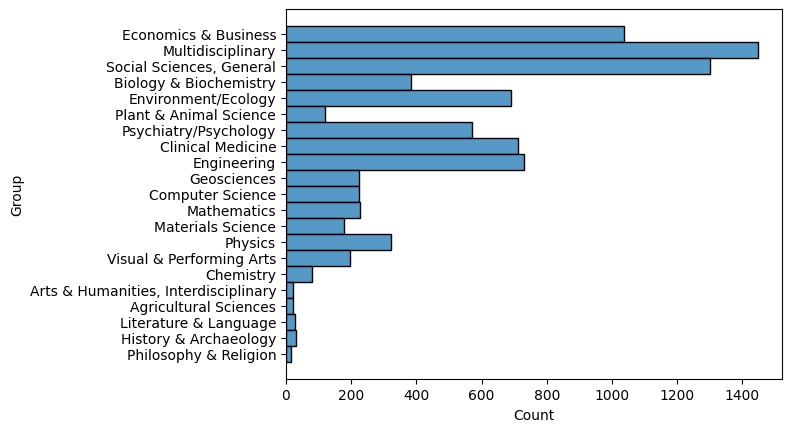

In [133]:
# do the same using groupby first so that I can merge with wos_groups data
group_counts = df2_explode.groupby("Group").size()
group_counts = group_counts.sort_values(ascending = False)
group_counts

Group
Multidisciplinary                       1449
Social Sciences, General                1302
Economics & Business                    1038
Engineering                              729
Clinical Medicine                        713
Environment/Ecology                      690
Psychiatry/Psychology                    572
Biology & Biochemistry                   385
Physics                                  322
Mathematics                              227
Computer Science                         224
Geosciences                              223
Visual & Performing Arts                 198
Materials Science                        179
Plant & Animal Science                   119
Chemistry                                 81
History & Archaeology                     31
Literature & Language                     28
Arts & Humanities, Interdisciplinary      23
Agricultural Sciences                     23
Philosophy & Religion                     15
dtype: int64

<Axes: ylabel='Group'>

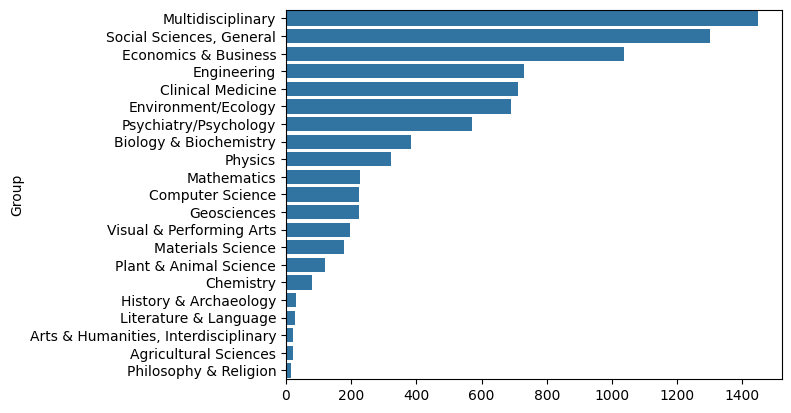

In [132]:
sns.barplot(group_counts, orient='h')

In [159]:
groupsums = pd.read_csv("../data/wos_group_counts_Apr2024.csv", encoding="utf-8")
groupsums.head()

,Group,categ_ct,journal_ct,citableitem_ct
0,Agricultural Sciences,7,430,56139
1,"Arts & Humanities, Interdisciplinary",8,1013,30624
2,Biology & Biochemistry,34,3969,696766
3,Chemistry,21,2371,683696
4,Clinical Medicine,59,7488,1075177


In [160]:
group_counts2 = pd.merge(group_counts.rename("group_ct"), groupsums, left_index = True, right_on = "Group")
group_counts2.head()

,group_ct,Group,categ_ct,journal_ct,citableitem_ct
14,1449,Multidisciplinary,36,5751,1100004
19,1302,"Social Sciences, General",41,6450,354940
6,1038,Economics & Business,21,3394,240626
7,729,Engineering,41,3585,802107
4,713,Clinical Medicine,59,7488,1075177


In [164]:
# create a new column indicating # of papers in this sample per 100,000 papers in that group in WoS data
group_counts2["numitems_insample_per100kinWOS"] = group_counts2["group_ct"] / group_counts2["citableitem_ct"] * 100000
group_counts2.head()

,group_ct,Group,categ_ct,journal_ct,citableitem_ct,numitems_insample_per100kinWOS
14,1449,Multidisciplinary,36,5751,1100004,131.726794
19,1302,"Social Sciences, General",41,6450,354940,366.822562
6,1038,Economics & Business,21,3394,240626,431.374831
7,729,Engineering,41,3585,802107,90.885630
4,713,Clinical Medicine,59,7488,1075177,66.314663


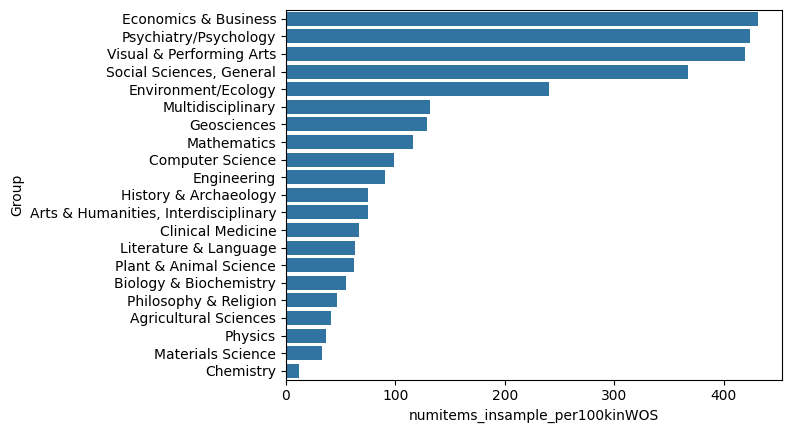

In [167]:
group_counts2 = group_counts2.sort_values(by = "numitems_insample_per100kinWOS", ascending = False)
sns.barplot(group_counts2, y="Group", x="numitems_insample_per100kinWOS");

## Visualize Papers over Time

In [169]:
df2_explode.columns

Index(['PT', 'AU', 'BA', 'BE', 'GP', 'AF', 'BF', 'CA', 'TI', 'SO', 'SE', 'BS',
       'LA', 'DT', 'CT', 'CY', 'CL', 'SP', 'HO', 'DE', 'ID', 'AB', 'C1', 'C3',
       'RP', 'EM', 'RI', 'OI', 'FU', 'FP', 'FX', 'CR', 'NR', 'TC', 'Z9', 'U1',
       'U2', 'PU', 'PI', 'PA', 'SN', 'EI', 'BN', 'J9', 'JI', 'PD', 'PY', 'VL',
       'IS', 'PN', 'SU', 'SI', 'MA', 'BP', 'EP', 'AR', 'DI', 'DL', 'D2', 'EA',
       'PG', 'WC', 'WE', 'SC', 'GA', 'PM', 'OA', 'HC', 'HP', 'DA', 'UT',
       'wos_categs', 'Category', 'Group'],
      dtype='object')

In [178]:
wosdf = pd.read_csv("../data/resilience/merged/merged-wos_subcols.csv", encoding = 'utf-8', index_col=[0])
print(wosdf.shape)
wosdf.head()

(3000, 30)


,PT,AU,AF,TI,SO,LA,DT,DE,ID,AB,...,SN,EI,BN,DI,UT,JI,PD,PY,WC,SC
0,J,"Jiang, YW; Ritchie, BW; Verreynne, ML","Jiang, Yawei; Ritchie, Brent W.; Verreynne, Ma...",Developing disaster resilience: A processual a...,TOURISM MANAGEMENT,English,Article,Disaster resilience; Dynamic capabilities; Res...,LONGITUDINAL-FIELD RESEARCH; ORGANIZATIONAL RE...,This study takes a processual view of resilien...,...,0261-5177,1879-3193,NaN,10.1016/j.tourman.2021.104374,WOS:000713714900002,Tourism Manage.,DEC,2021,"Environmental Studies; Hospitality, Leisure, S...",Environmental Sciences & Ecology; Social Scien...
1,J,"Nystrom, M; Graham, NAJ; Lokrantz, J; Norstrom...","Nystrom, M.; Graham, N. A. J.; Lokrantz, J.; N...",Capturing the cornerstones of coral reef resil...,CORAL REEFS,English,Review,Diversity; Functional groups; Management; Phas...,GREAT-BARRIER-REEF; CATASTROPHIC REGIME SHIFTS...,Coral reefs can undergo unexpected and dramati...,...,0722-4028,1432-0975,NaN,10.1007/s00338-008-0426-z,WOS:000260616400011,Coral Reefs,DEC,2008,Marine & Freshwater Biology,Marine & Freshwater Biology
2,J,"Cassidy, S","Cassidy, Simon",The Academic Resilience Scale (ARS-30): A New ...,FRONTIERS IN PSYCHOLOGY,English,Article,resilience; academic resilience; adversity; me...,CONNOR-DAVIDSON RESILIENCE; CD-RISC; BUOYANCY;...,Resilience is a psychological construct observ...,...,1664-1078,NaN,NaN,10.3389/fpsyg.2016.01787,WOS:000388022000001,Front. Psychol.,NOV 18,2016,"Psychology, Multidisciplinary",Psychology
3,J,"Adeyeye, K; Emmitt, S","Adeyeye, Kemi; Emmitt, Stephen","Multi-scale, integrated strategies for urban f...",INTERNATIONAL JOURNAL OF DISASTER RESILIENCE I...,English,Article,Governance; Integration; Flooding; Resilience;...,CLIMATE; SUSTAINABILITY; CHALLENGES; PERSPECTI...,Purpose - This study aims to determine and con...,...,1759-5908,1759-5916,NaN,10.1108/IJDRBE-11-2016-0044,WOS:000425493200003,Int. J. Disaster Resil. Built Environ.,NaN,2017,Environmental Studies,Environmental Sciences & Ecology
4,J,"Wiig, S; Haraldseid-Driftland, C; Dombestein, ...","Wiig, Siri; Haraldseid-Driftland, Cecilie; Dom...",Backstage researching resilience researchers -...,INTERNATIONAL JOURNAL OF HEALTH GOVERNANCE,English,Review,Resilience in healthcare; Researching research...,NaN,PurposeResilience in healthcare is fundamental...,...,2059-4631,NaN,NaN,10.1108/IJHG-07-2022-0068,WOS:000904828800001,Int. J. Health Gov.,MAR 27,2023,Health Policy & Services,Health Care Sciences & Services


In [181]:
wos_yrs = wosdf.groupby("PY").size()
wos_yrs

PY
1995      3
1997      2
1998      5
1999      2
2000      2
2001      4
2002      7
2003      5
2004      3
2005     14
2006     30
2007     15
2008     19
2009     29
2010     46
2011     40
2012     61
2013     96
2014    244
2015    194
2016    185
2017    203
2018    285
2019    282
2020    316
2021    333
2022    366
2023    209
dtype: int64

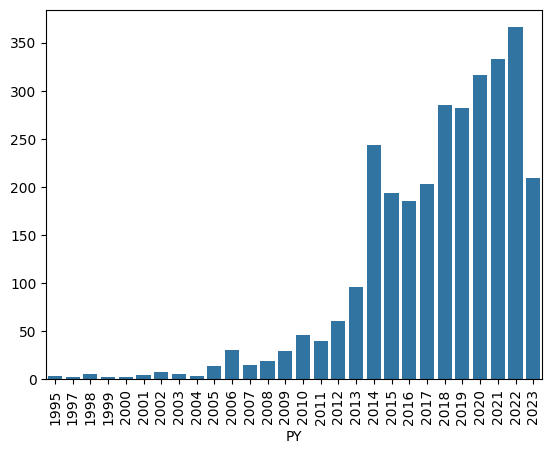

In [184]:
sns.barplot(wos_yrs)
plt.xticks(rotation=90);

## Visualize Distribution of Papers across time by WoS Group

In [185]:
df2_explode.head()

,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,GA,PM,OA,HC,HP,DA,UT,wos_categs,Category,Group
0,J,"Jiang, YW; Ritchie, BW; Verreynne, ML",NaN,NaN,NaN,"Jiang, Yawei; Ritchie, Brent W.; Verreynne, Ma...",NaN,NaN,Developing disaster resilience: A processual a...,TOURISM MANAGEMENT,...,WQ3JE,NaN,NaN,NaN,NaN,2023-08-03,WOS:000713714900002,environmental studies,environmental studies,Economics & Business
0,J,"Jiang, YW; Ritchie, BW; Verreynne, ML",NaN,NaN,NaN,"Jiang, Yawei; Ritchie, Brent W.; Verreynne, Ma...",NaN,NaN,Developing disaster resilience: A processual a...,TOURISM MANAGEMENT,...,WQ3JE,NaN,NaN,NaN,NaN,2023-08-03,WOS:000713714900002,environmental studies,environmental studies,Multidisciplinary
0,J,"Jiang, YW; Ritchie, BW; Verreynne, ML",NaN,NaN,NaN,"Jiang, Yawei; Ritchie, Brent W.; Verreynne, Ma...",NaN,NaN,Developing disaster resilience: A processual a...,TOURISM MANAGEMENT,...,WQ3JE,NaN,NaN,NaN,NaN,2023-08-03,WOS:000713714900002,environmental studies,environmental studies,"Social Sciences, General"
3,J,"Nystrom, M; Graham, NAJ; Lokrantz, J; Norstrom...",NaN,NaN,NaN,"Nystrom, M.; Graham, N. A. J.; Lokrantz, J.; N...",NaN,NaN,Capturing the cornerstones of coral reef resil...,CORAL REEFS,...,368JC,NaN,NaN,NaN,NaN,2023-08-03,WOS:000260616400011,marine & freshwater biology,marine & freshwater biology,Biology & Biochemistry
3,J,"Nystrom, M; Graham, NAJ; Lokrantz, J; Norstrom...",NaN,NaN,NaN,"Nystrom, M.; Graham, N. A. J.; Lokrantz, J.; N...",NaN,NaN,Capturing the cornerstones of coral reef resil...,CORAL REEFS,...,368JC,NaN,NaN,NaN,NaN,2023-08-03,WOS:000260616400011,marine & freshwater biology,marine & freshwater biology,Environment/Ecology


In [198]:
df2_yr_group = df2_explode.groupby(["Group", "PY"])["PT"].count().reset_index(name="yr_ct")

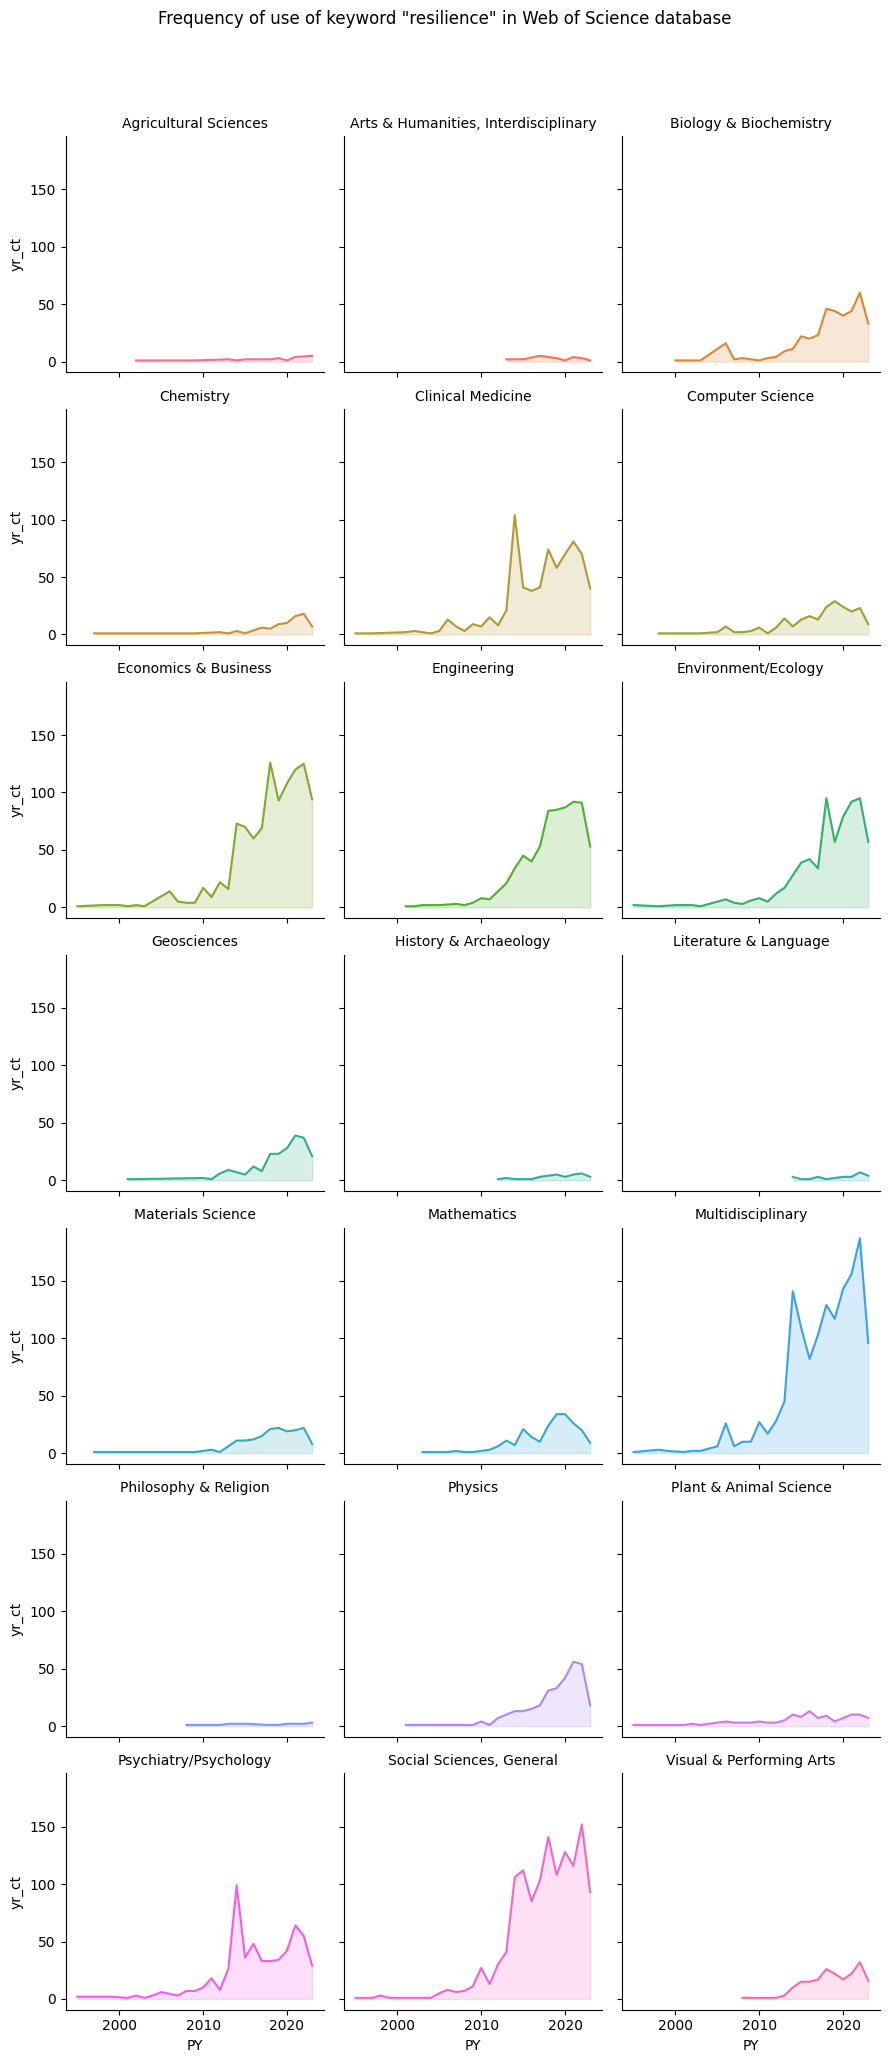

In [210]:
# code for creating the faceted grid of area graphs below is 
## adapted from: https://python-graph-gallery.com/242-area-chart-and-faceting/

# Create a grid : initialize it
g = sns.FacetGrid(df2_yr_group, col="Group", hue="Group", col_wrap = 3)

# Add the line over the area with the plot function
g = g.map(plt.plot, 'PY', 'yr_ct')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'PY', 'yr_ct', alpha=0.2).set_titles("{col_name}")

# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g = g.figure.suptitle('Frequency of use of keyword "resilience" in Web of Science database')